<a href="https://colab.research.google.com/github/N6118/MiniML/blob/main/HousepricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

data = sklearn.datasets.fetch_california_housing()


In [3]:
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
dframe =pd.DataFrame(data.data,columns = data.feature_names)

In [5]:
dframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
dframe["Price"]= data.target

In [7]:
dframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
correlation = dframe.corr()

<Axes: >

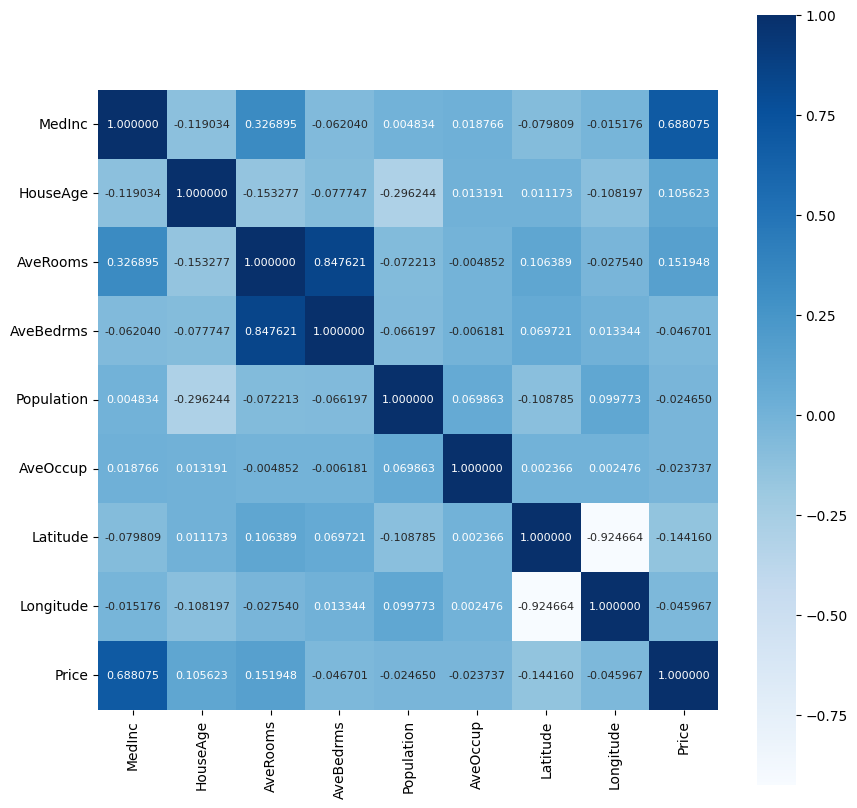

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar =True ,square = True , fmt ="1f",annot =True , annot_kws={"size":8},cmap="Blues" )

In [12]:
X = dframe.drop(["Price"],axis=1)
Y = dframe["Price"]

In [13]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size= 0.1 , random_state=2)

In [14]:
model = XGBRegressor()

In [16]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
train_prediction = model.predict(X_train)

In [19]:
score1 = metrics.r2_score(Y_train , train_prediction)
score2 = metrics.mean_absolute_error(Y_train , train_prediction)

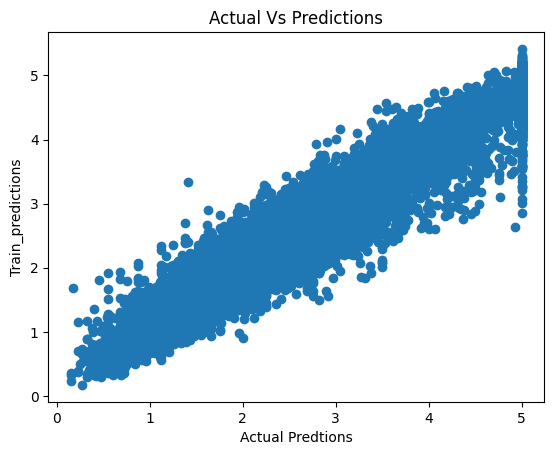

In [23]:
plt.scatter(Y_train,train_prediction)
plt.xlabel("Actual Predtions")
plt.ylabel("Train_predictions")
plt.title("Actual Vs Predictions")
plt.show()

In [20]:
test_prediction = model.predict(X_test)
scot1 = metrics.r2_score(Y_test,test_prediction)
scot2 = metrics.mean_absolute_error(Y_test,test_prediction)

In [21]:
print("R2_train",score1)
print("MAE_train",score2)
print("R2_test",scot1)
print("MAE_test",scot2)

R2_train 0.9373340097168722
MAE_train 0.2043056007075664
R2_test 0.8316120238184553
MAE_test 0.3109300928688003
